In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
weights_path = os.path.join("yolo-coco","yolov3.weights")
config_path = os.path.join("yolo-coco","yolov3.cfg")

net = cv2.dnn.readNetFromDarknet(config_path,weights_path)
names = net.getLayerNames()

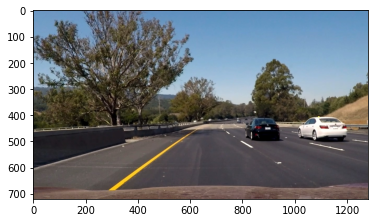

In [4]:
path = "test6.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [17]:
def detect_cars(img):
    if img is None:
        return img
    (H, W) = img.shape[:2]
    layers_names = [names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), crop=False, swapRB=False)
    net.setInput(blob)
    #start_t = time.time()

    layers_output = net.forward(layers_names)

    boxes = []
    confidences = []
    classIDs = []

    for output in layers_output:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if (confidence > 0.85):
                box = detection[:4] * np.array([W, H, W, H])
                bx, by, bw, bh = box.astype("int")

                x = int(bx - (bw / 2))
                y = int(by - (bh / 2))

                boxes.append([x, y, int(bw), int(bh)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0.8)
    labels_path = os.path.join("yolo-coco", "coco.names")
    labels = open(labels_path).read().strip().split("\n")
    idxs = np.asarray(idxs)
    for i in idxs.flatten():
        (x, y) = [boxes[i][0], boxes[i][1]]
        (w, h) = [boxes[i][2], boxes[i][3]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)
        cv2.putText(img, "{}: {}".format(labels[classIDs[i]], confidences[i]), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0,255,0), 2)
    return img

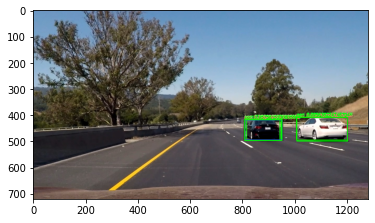

In [18]:
out_img = detect_cars(img)
plt.imshow(out_img)